In [29]:
from google.colab import drive
drive.mount('/content/drive')
DRIVE_PATH = '/content/drive/MyDrive/dreambooth_wiki'
!mkdir -p '{DRIVE_PATH}'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd '{DRIVE_PATH}'
!rm -rf diffusers
!git clone https://github.com/huggingface/diffusers
%cd '{DRIVE_PATH}'

/content/drive/MyDrive/dreambooth_wiki
Cloning into 'diffusers'...
remote: Enumerating objects: 90890, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 90890 (delta 0), reused 3 (delta 0), pack-reused 90882 (from 1)
Receiving objects: 100% (90890/90890), 66.41 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (66900/66900), done.
Updating files: 100% (1983/1983), done.
/content/drive/MyDrive/dreambooth_wiki


In [5]:
%cd '{DRIVE_PATH}'
%cd diffusers
!pip install .
%cd examples/dreambooth
!pip install -r requirements.txt
%cd '{DRIVE_PATH}'

/content/drive/MyDrive/dreambooth_wiki
/content/drive/MyDrive/dreambooth_wiki/diffusers
Processing /content/drive/MyDrive/dreambooth_wiki/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.34.0.dev0-py3-none-any.whl size=3602841 sha256=ab452fccdaff217454abffa7db7a15200e8d0ca1de244d013ec96b9b18ff044f
  Stored in directory: /tmp/pip-ephem-wheel-cache-4g_yqny4/wheels/aa/9a/28/01aad6bcb59e1ae6712c362829f327eb69e2ad8ab0c0c9a370
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.33.1
    Uninstalling diffusers-0.33.1:
      Successfully uninstalled diffusers-0.33.1
/content/drive/MyDrive/dreambooth_wiki/diffusers/examples/dreambooth
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00
  At

In [2]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
#@title Training
%cd '{DRIVE_PATH}'
import re
import os

!rm -rf output_model
!mkdir -p output_model
!rm -rf class_images
!mkdir -p class_images

# itr=0
dirs = ["Impressionism","Realism","Early_Renaissance","Action_painting"]
# for root, dirs, files in os.walk("wikiart_curated"):
for dir_name in dirs:
  source_folder_path = os.path.join("./wikiart_curated", dir_name)
  class_name = re.sub(r'[0-9]','',dir_name).replace("_"," ")

  MODEL_NAME="CompVis/stable-diffusion-v1-4"
  INSTANCE_DIR=source_folder_path
  OUTPUT_DIR=f"./output_model/{dir_name}"
  CLASS_DIR=f"./class_images/{dir_name}"

  print(f"--------------------Training {dir_name}--------------------")

  !accelerate launch diffusers/examples/dreambooth/train_dreambooth.py \
    --pretrained_model_name_or_path="{MODEL_NAME}"  \
    --instance_data_dir="{INSTANCE_DIR}" \
    --output_dir="{OUTPUT_DIR}" \
    --class_data_dir="{CLASS_DIR}" \
    --with_prior_preservation --prior_loss_weight=1.0 \
    --instance_prompt="a photo of sks {class_name}" \
    --class_prompt="a photo of {class_name}" \
    --resolution=512 \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 \
    --use_8bit_adam \
    --learning_rate=2e-6 \
    --lr_scheduler="constant" \
    --lr_warmup_steps=0 \
    --num_class_images=10 \
    --max_train_steps=100
  # itr += 1
  # if (itr == 5):
  #     break

/content/drive/MyDrive/dreambooth_wiki
--------------------Training Impressionism--------------------
2025-04-30 14:40:49.471201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746024049.721375    4829 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746024049.786215    4829 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 14:40:50.304715: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
04/30/2025 14:40:56 - I

In [ ]:
def generate_images_for_class(prompt, pipe ,output_dir ,num_images = 5):
    """
    Generate images using Stable Diffusion for a given prompt and save them.
    """
    !rm -rf "{output_dir}"
    !mkdir -p "{output_dir}"
    generated_images = []
    for i in range(num_images):
        image = pipe(prompt).images[0].resize((256, 256))
        image_path = os.path.join(output_dir, f"generated_{i}.png")
        image.save(image_path)
        generated_images.append(image)
    return generated_images

In [ ]:
#@title Inference
from diffusers import StableDiffusionPipeline
import torch
%cd '{DRIVE_PATH}'

!rm -rf generated_images
!mkdir -p generated_images

for dir_name in dirs:
  model_id = f"./output_model/{dir_name}"
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
  class_name = re.sub(r'[0-9]','',dir_name).replace("_"," ")
  prompt = f"a photo of sks {class_name}"
  out_dir = f"./generated_images/{dir_name}"
  generated_images = generate_images_for_class(prompt,pipe,out_dir,num_images=5)

%cd '{DRIVE_PATH}'

/content/drive/MyDrive/dreambooth_wiki


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/content/drive/MyDrive/dreambooth_wiki


In [6]:
!pip install git+https://github.com/openai/CLIP.git
!pip install pytorch_fid

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8zknabh9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-8zknabh9
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=24468052755087902423018c23c22438d8741d8f18b37e87e7cb6a3822709619
  Stored in directory: /tmp/pip-ephem-wheel-cache-4g25mdqy/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip


In [7]:
from PIL import Image
def read_all_images(image_dir):
  images = []
  for root, dirs, files in os.walk(image_dir):
    for file in files:
      images.append(Image.open(os.path.join(root, file)))
  return images

In [13]:
import clip
import numpy as np

def compute_clip_similarity(images, prompt, clip_model, clip_preprocess, device="cuda"):
    """Compute average CLIP cosine similarity between generated images and a prompt."""
    text_tokens = clip.tokenize([prompt]).to(device)
    with torch.no_grad():
      text_features = clip_model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    similarities = []
    for img in images:
        image_input = clip_preprocess(img).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = clip_model.encode_image(image_input)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        sim = (image_features @ text_features.T).item()
        similarities.append(sim)
    return np.mean(similarities)

In [14]:
#@title CLIP score
%cd '{DRIVE_PATH}'
import torch
import os
from pytorch_fid import fid_score
import re
dirs = ["Impressionism","Realism","Early_Renaissance","Action_painting"]
for dir_name in dirs:
  out_dir = f"./generated_images/{dir_name}"
  class_name = re.sub(r'[0-9]','',dir_name).replace("_"," ")
  prompt = f"a photo of sks {class_name}"
  generated_images = read_all_images(out_dir)
  clip_model, clip_preprocess = clip.load("ViT-L/14", device="cuda")
  clip_score = compute_clip_similarity(generated_images, prompt, clip_model, clip_preprocess)
  print(f"CLIP SCORE for {dir_name}: {clip_score}")
%cd '{DRIVE_PATH}'

/content/drive/MyDrive/dreambooth_wiki


100%|███████████████████████████████████████| 890M/890M [00:11<00:00, 83.0MiB/s]


CLIP SCORE for Impressionism: 0.1972900390625
CLIP SCORE for Realism: 0.24541015625
CLIP SCORE for Early_Renaissance: 0.1755859375
CLIP SCORE for Action_painting: 0.270947265625
/content/drive/MyDrive/dreambooth_wiki


In [23]:
def resize_images_in_folder(folder_path, target_size=(299, 299)):
    """
    Resizes all image files in the folder (and subfolders) to the target size.
    """
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize and overwrite the image
                        img_resized = img.resize(target_size, Image.LANCZOS)
                        img_resized.save(file_path)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    print(f"Resized all images in {folder_path} to {target_size}")

In [25]:
#@title FID
%cd '{DRIVE_PATH}'
from pytorch_fid import fid_score

for dir_name in dirs:
  out_dir = f"./generated_images/{dir_name}"
  in_dir = f"./wikiart_curated/{dir_name}"
  resize_images_in_folder(in_dir,(256,256))
  fid_value = fid_score.calculate_fid_given_paths(
            [in_dir, out_dir],
            batch_size=5, device="cuda", dims=2048
        )
  print(f"FID SCORE for {dir_name}: {fid_value}")
%cd '{DRIVE_PATH}'

/content/drive/MyDrive/dreambooth_wiki
Resized all images in ./wikiart_curated/Impressionism to (256, 256)


100%|██████████| 1/1 [00:00<00:00,  4.42it/s]


FID SCORE for Impressionism: 342.57473788551135
Resized all images in ./wikiart_curated/Realism to (256, 256)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


FID SCORE for Realism: 388.8085652115037
Resized all images in ./wikiart_curated/Early_Renaissance to (256, 256)


100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


FID SCORE for Early_Renaissance: 340.666504272638
Resized all images in ./wikiart_curated/Action_painting to (256, 256)


100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


FID SCORE for Action_painting: 466.7979158113578
/content/drive/MyDrive/dreambooth_wiki


/content/drive/MyDrive/dreambooth_wiki


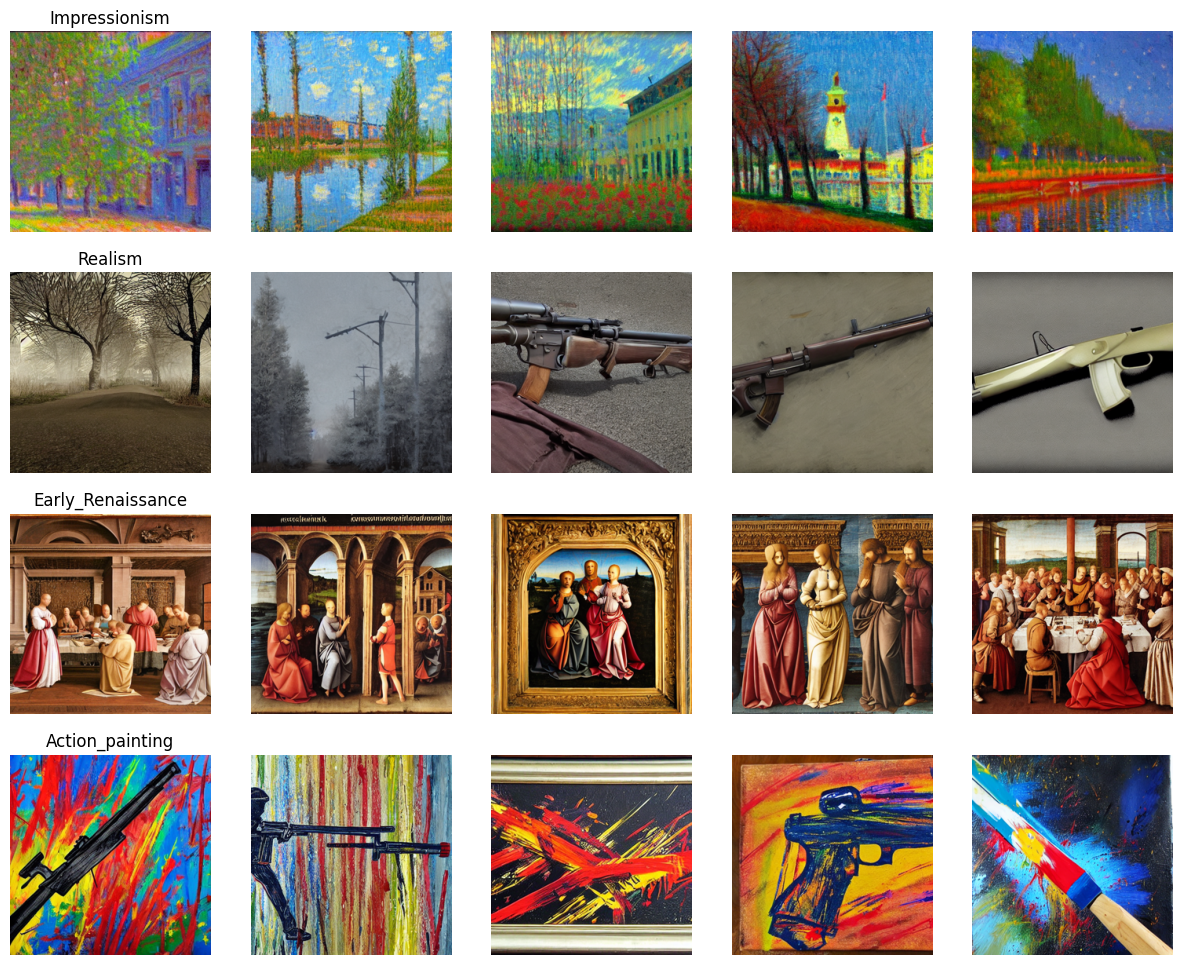

/content/drive/MyDrive/dreambooth_wiki


In [41]:
%cd '{DRIVE_PATH}'
import matplotlib.pyplot as plt
dirs = ["Impressionism","Realism","Early_Renaissance","Action_painting"]
rows = 4
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
for i,dir_name in enumerate(dirs):
  images = read_all_images(f"./generated_images/{dir_name}")
  # print(f"Generated images: {dir_name}")
  axs[i][0].set_title(dir_name)
  for j,image in enumerate(images):
    ax = axs[i][j]
    ax.axis('off')
    ax.imshow(image)
plt.savefig('./graph/images_wiki.png')
plt.show()
%cd '{DRIVE_PATH}'